# Eksploracyjna analiza danych

## Warsztaty badawcze - Kamien milowy 1

### Borowski Mateusz, Krężel Jan, Kraszewski Konstanty

UNSW-NB15

Opis: Przetworzone dane ruchu sieciowego, podczas zwykłego użycia i 9 różnych 
typów ataków sieciowych.
Sugerowane zadanie: 
- detekcja ataku.


[Link do danych](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)
pd.set_option('display.max_columns', None)

sns.set()
%matplotlib inline

In [2]:
df_test = pd.read_csv('data/UNSW_NB15_testing-set.csv', index_col=0)
df_train = pd.read_csv('data/UNSW_NB15_training-set.csv', index_col=0)
df_features = pd.read_csv('data/UNSW_NB15_features.csv', encoding='cp1252', index_col=0)

# ujednolicenie nazw pomiędzy ramkami danych
df_features.Name = list(map(lambda x : x.lower(), df_features.Name))
df_features.loc[:, 'Type '] = list(map(lambda x : x.lower(), df_features.loc[:, 'Type ']))
df_features.loc[df_features.Name == 'ct_src_ ltm', 'Name'] = 'ct_src_ltm'
df_features.loc[df_features.Name == 'res_bdy_len', 'Name'] = 'response_body_len'
df_features.loc[df_features.Name == 'smeansz', 'Name'] = 'smean'
df_features.loc[df_features.Name == 'dmeansz', 'Name'] = 'dmean'
df_features.loc[df_features.Name == 'sintpkt', 'Name'] = 'sinpkt'
df_features.loc[df_features.Name == 'dintpkt', 'Name'] = 'dinpkt'

In [3]:
df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


### Opisy zmiennych


| Name              | Type    | Description                                                                                                                                                        |
|:------------------|:--------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| proto             | nominal | Transaction protocol                                                                                                                                               |
| state             | nominal | Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)     |
| dur               | float   | Record total duration                                                                                                                                              |
| sbytes            | integer | Source to destination transaction bytes                                                                                                                            |
| dbytes            | integer | Destination to source transaction bytes                                                                                                                            |
| sttl              | integer | Source to destination time to live value                                                                                                                           |
| dttl              | integer | Destination to source time to live value                                                                                                                           |
| sloss             | integer | Source packets retransmitted or dropped                                                                                                                            |
| dloss             | integer | Destination packets retransmitted or dropped                                                                                                                       |
| service           | nominal | http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service                                                                                         |
| sload             | float   | Source bits per second                                                                                                                                             |
| dload             | float   | Destination bits per second                                                                                                                                        |
| spkts             | integer | Source to destination packet count                                                                                                                                 |
| dpkts             | integer | Destination to source packet count                                                                                                                                 |
| swin              | integer | Source TCP window advertisement value                                                                                                                              |
| dwin              | integer | Destination TCP window advertisement value                                                                                                                         |
| stcpb             | integer | Source TCP base sequence number                                                                                                                                    |
| dtcpb             | integer | Destination TCP base sequence number                                                                                                                               |
| smean             | integer | Mean of the ?ow packet size transmitted by the src                                                                                                                 |
| dmean             | integer | Mean of the ?ow packet size transmitted by the dst                                                                                                                 |
| trans_depth       | integer | Represents the pipelined depth into the connection of http request/response transaction                                                                            |
| response_body_len | integer | Actual uncompressed content size of the data transferred from the server’s http service.                                                                           |
| sjit              | float   | Source jitter (mSec)                                                                                                                                               |
| djit              | float   | Destination jitter (mSec)                                                                                                                                          |
| sinpkt            | float   | Source interpacket arrival time (mSec)                                                                                                                             |
| dinpkt            | float   | Destination interpacket arrival time (mSec)                                                                                                                        |
| tcprtt            | float   | TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.                                                                                            |
| synack            | float   | TCP connection setup time, the time between the SYN and the SYN_ACK packets.                                                                                       |
| ackdat            | float   | TCP connection setup time, the time between the SYN_ACK and the ACK packets.                                                                                       |
| is_sm_ips_ports   | binary  | If source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0                                        |
| ct_state_ttl      | integer | No. for each state (6) according to specific range of values for source/destination time to live (10) (11).                                                        |
| ct_flw_http_mthd  | integer | No. of flows that has methods such as Get and Post in http service.                                                                                                |
| is_ftp_login      | binary  | If the ftp session is accessed by user and password then 1 else 0.                                                                                                 |
| ct_ftp_cmd        | integer | No of flows that has a command in ftp session.                                                                                                                     |
| ct_srv_src        | integer | No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).                                   |
| ct_srv_dst        | integer | No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).                              |
| ct_dst_ltm        | integer | No. of connections of the same destination address (3) in 100 connections according to the last time (26).                                                         |
| ct_src_ltm        | integer | No. of connections of the same source address (1) in 100 connections according to the last time (26).                                                              |
| ct_src_dport_ltm  | integer | No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).                                  |
| ct_dst_sport_ltm  | integer | No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).                                  |
| ct_dst_src_ltm    | integer | No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).                                    |
| attack_cat        | nominal | The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms |
| label             | binary  | 0 for normal and 1 for attack records                                                                                                                              |

In [4]:
print('Kolumny z ramki danych, których nie ma opisów:')
print()
print(list(df_train.columns[~df_train.columns.isin(df_features.Name)]))

Kolumny z ramki danych, których nie ma opisów:

['rate']


In [5]:
print('Kolumny, których nie ma w ramce danych, ale są ich opisy:')
print()
print(list(df_features.Name[~df_features.Name.isin(df_train.columns)]))

Kolumny, których nie ma w ramce danych, ale są ich opisy:

['srcip', 'sport', 'dstip', 'dsport', 'stime', 'ltime']


Zamienna `attack_cat` zawiera informację o kategorii ruchu sieciowego (`Normal` dla normalnego ruchu sieciowego, a także 8 innych etykiet dla różnych typów ataków, np. `Dos`), natomiast zmienna `label` zawiera informację binarną, czy dany rekord dotyczy normalnego ruchu sieciowego, czy ataku. W tej analizie skupimy się na zmiennej `label` jako zmiennej celu.

In [6]:
list(df_train.attack_cat.unique())

['Normal',
 'Reconnaissance',
 'Backdoor',
 'DoS',
 'Exploits',
 'Analysis',
 'Fuzzers',
 'Worms',
 'Shellcode',
 'Generic']

### Opisy typów ataków

|Class|Description|
|---|---|
|Normal| Normal unmalicious flows|
|Reconnaissance| A technique for gathering information about a network host and is also known as a probe.|
|Backdoor| A technique that aims to bypass security mechanisms by replying to specific constructed client applications.|
|DoS| Denial of Service is an attempt to overload a computer system’s resources with the aim of preventing access to or availability of its data.|
|Exploits| Are sequences of commands controlling the behaviour of a host through a known vulnerability.|
|Analysis| A group that presents a variety of threats that target web applications through ports, emails and scripts.|
|Fuzzers| An attack in which the attacker sends large amounts of random data which cause a system to crash and also aim to discover security vulnerabilities in a system.|
|Worms| Attacks that replicate themselves and spread to other computers.|
|Shellcode| A malware that penetrates a code to control a victim’s host.|
|Generic| A method that targets cryptography and causes a collision with each block-cipher.|

In [7]:
print(f"Wielkość zbioru treningowego:     {df_train.shape}.")
print(f"Wielkość zbioru testowego:        {df_test.shape}.")

Wielkość zbioru treningowego:     (82332, 44).
Wielkość zbioru testowego:        (175341, 44).


Dane na których przeprowadzamy edę, to nie jest całość dostępnego zbioru, tylko próbka danych treningowych, którą udostępnili twórcy. 

### Sprawdzenie ewentualnych braków danych

In [9]:
df_train.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [10]:
df_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


### Rozkłady zmiennych numerycznych

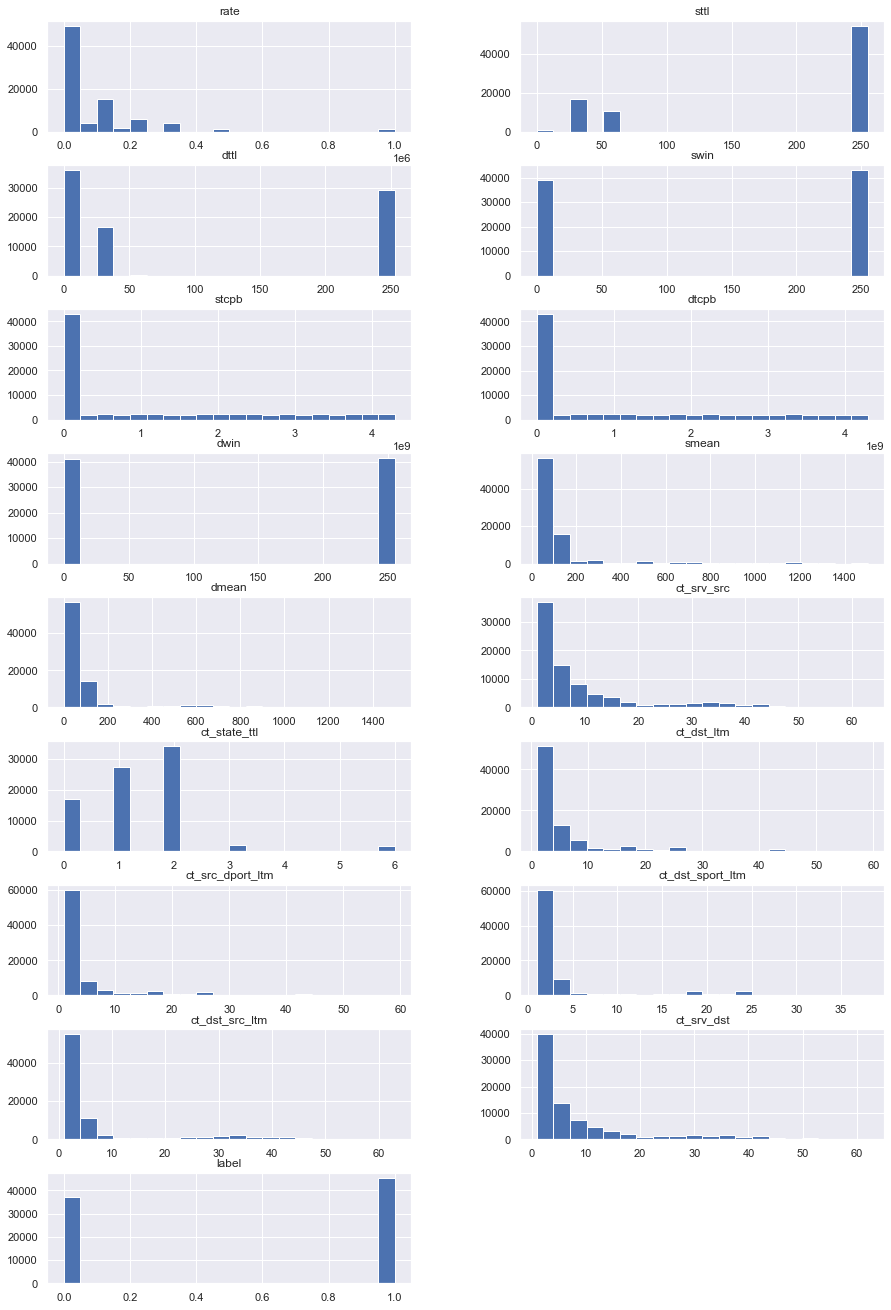

In [11]:
hist_columns = ['rate', 'sttl', 'dttl', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', \
    'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', \
        'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'label']

df_hist = df_train[hist_columns]
df_hist.hist(bins = 20, figsize = (15,55), layout=(21,2))
plt.show()

### Detekcja outlierów

In [8]:
numerical_columns = df_train.select_dtypes('number').columns
categorical_columns = df_train.select_dtypes('object').columns

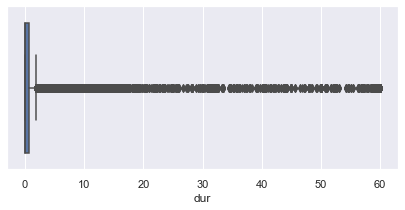

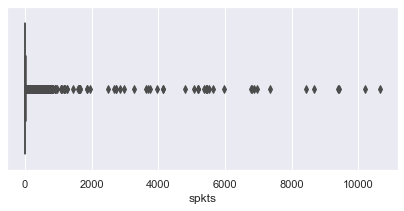

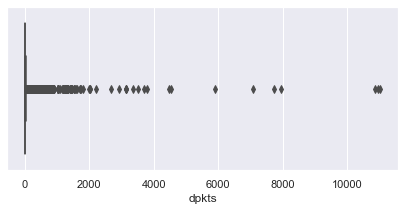

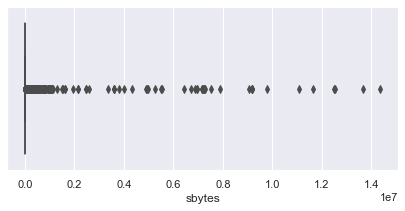

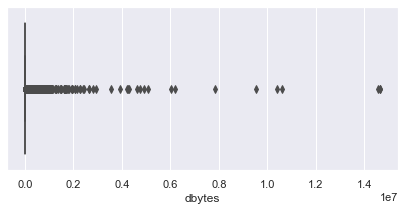

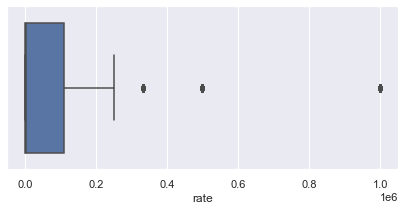

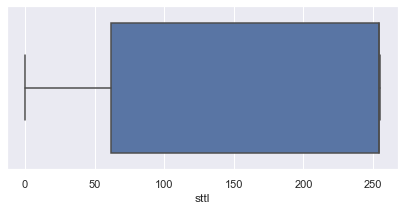

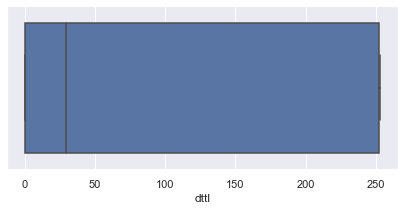

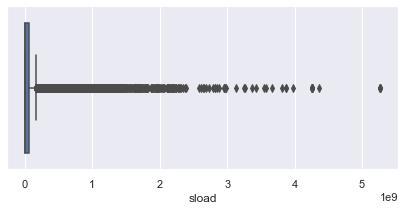

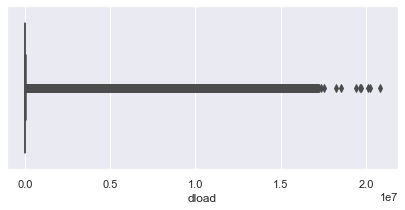

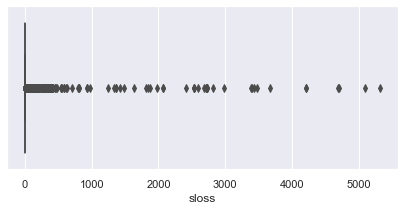

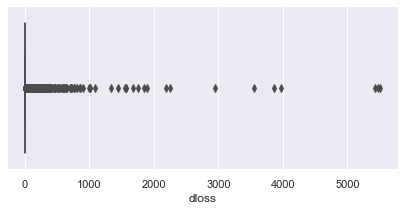

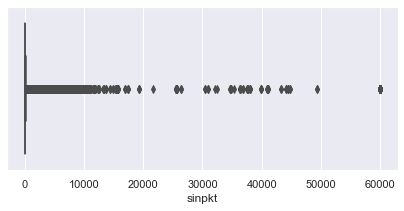

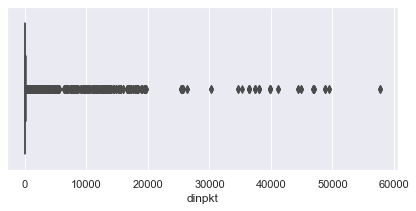

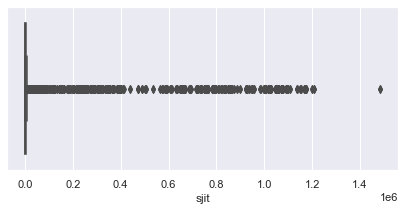

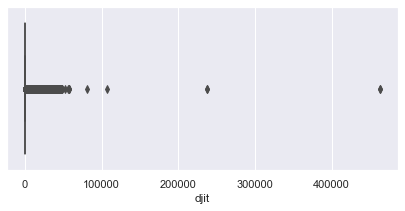

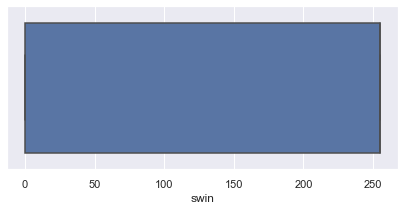

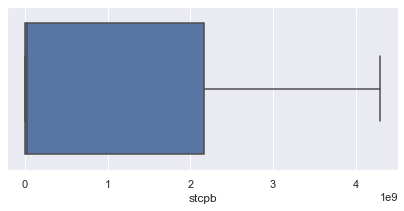

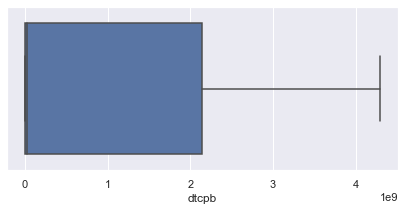

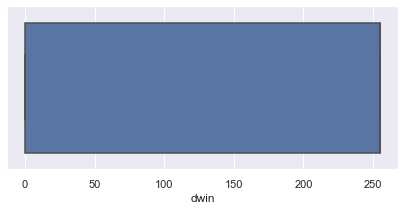

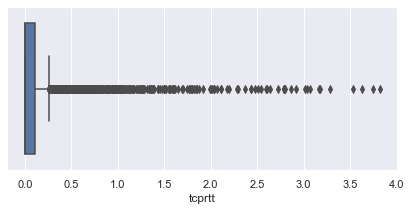

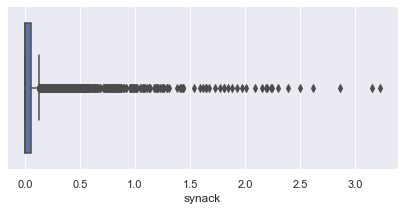

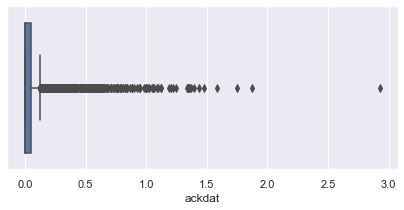

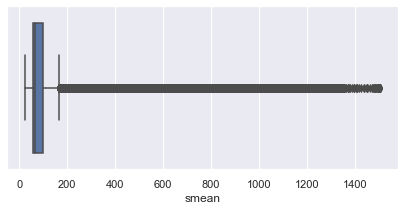

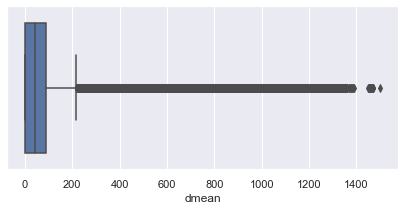

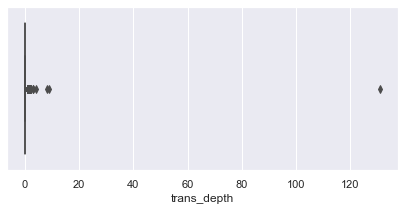

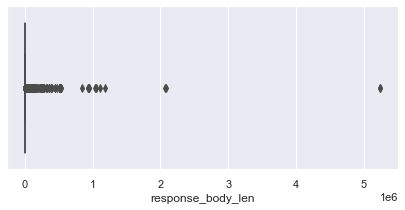

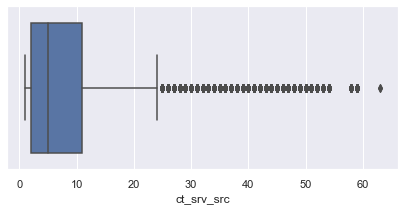

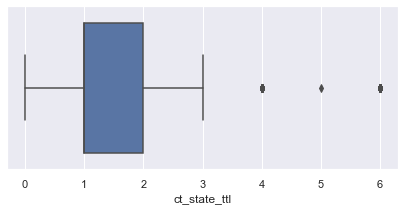

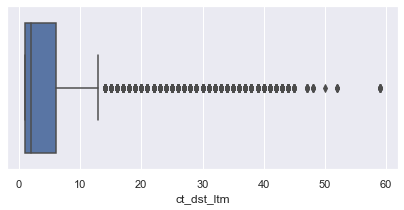

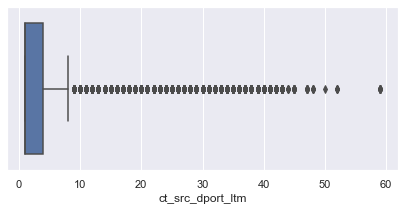

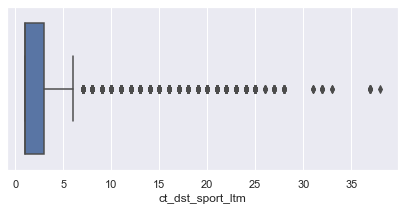

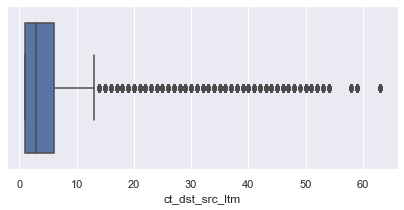

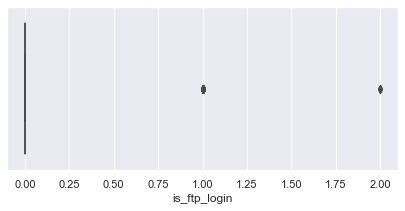

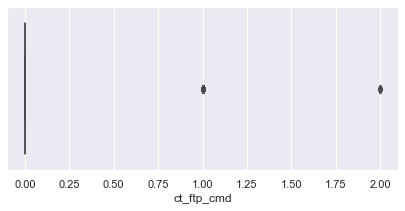

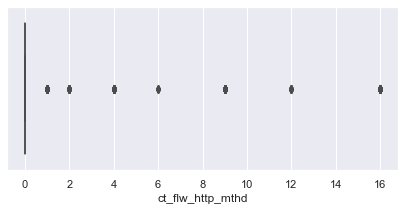

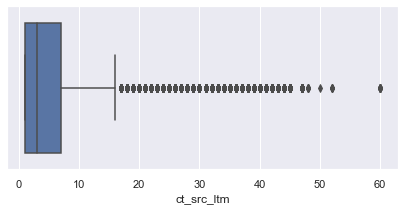

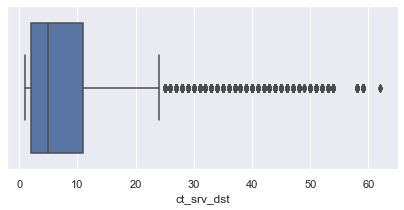

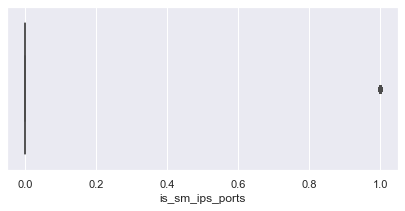

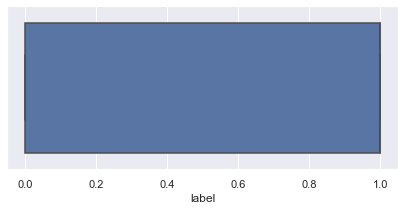

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df_train, x=col)
    plt.show()

Prawie każda zmienna zawiera spore ilości outlierów. Wyjątki stanowią zmienne takie jak `dwin`, `dtcpb`, `stcpb`, `swin`, `dttl`, `sttl`.

### Histogramy zmiennych kategorycznych

In [13]:
print(f"Liczba klas zmiennej 'proto': {df_train['proto'].unique().size}.")
print(f"Liczba klas pojawiających się mniej niż 35 razy: {sum(df_train['proto'].value_counts()<35)}")

Liczba klas zmiennej 'proto': 131.
Liczba klas pojawiających się mniej niż 35 razy: 116


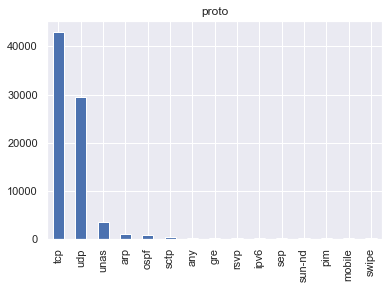

In [14]:
df_train['proto'].value_counts()[df_train['proto'].value_counts()>=35].plot(kind='bar').set_title('proto')
plt.show()

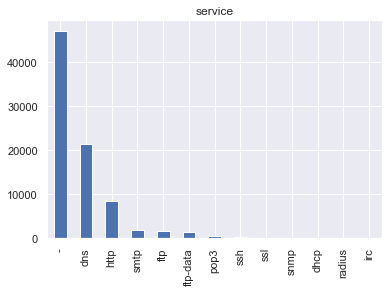

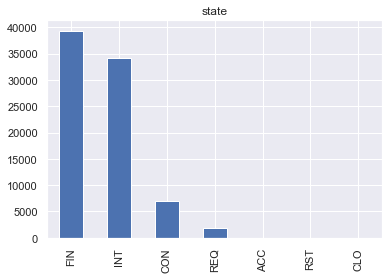

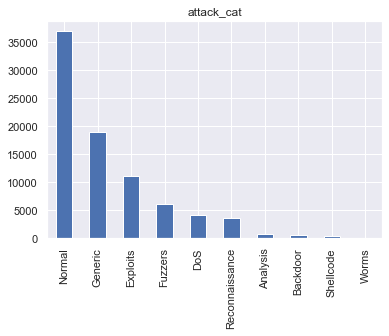

In [15]:
for col in df_train[categorical_columns[categorical_columns!='proto']]:
    df_train[col].value_counts().plot(kind='bar').set_title(col)
    plt.show()

W zasadzie każda zmienna kategoryczna posiada kategorię dominującą. Nie dziwi to w przypadku np. `attack_cat`, gdyż większość ruchu sieciowego to zwyczajne użytkowanie internetu.

### Korelacja pomiędzy zmiennymi

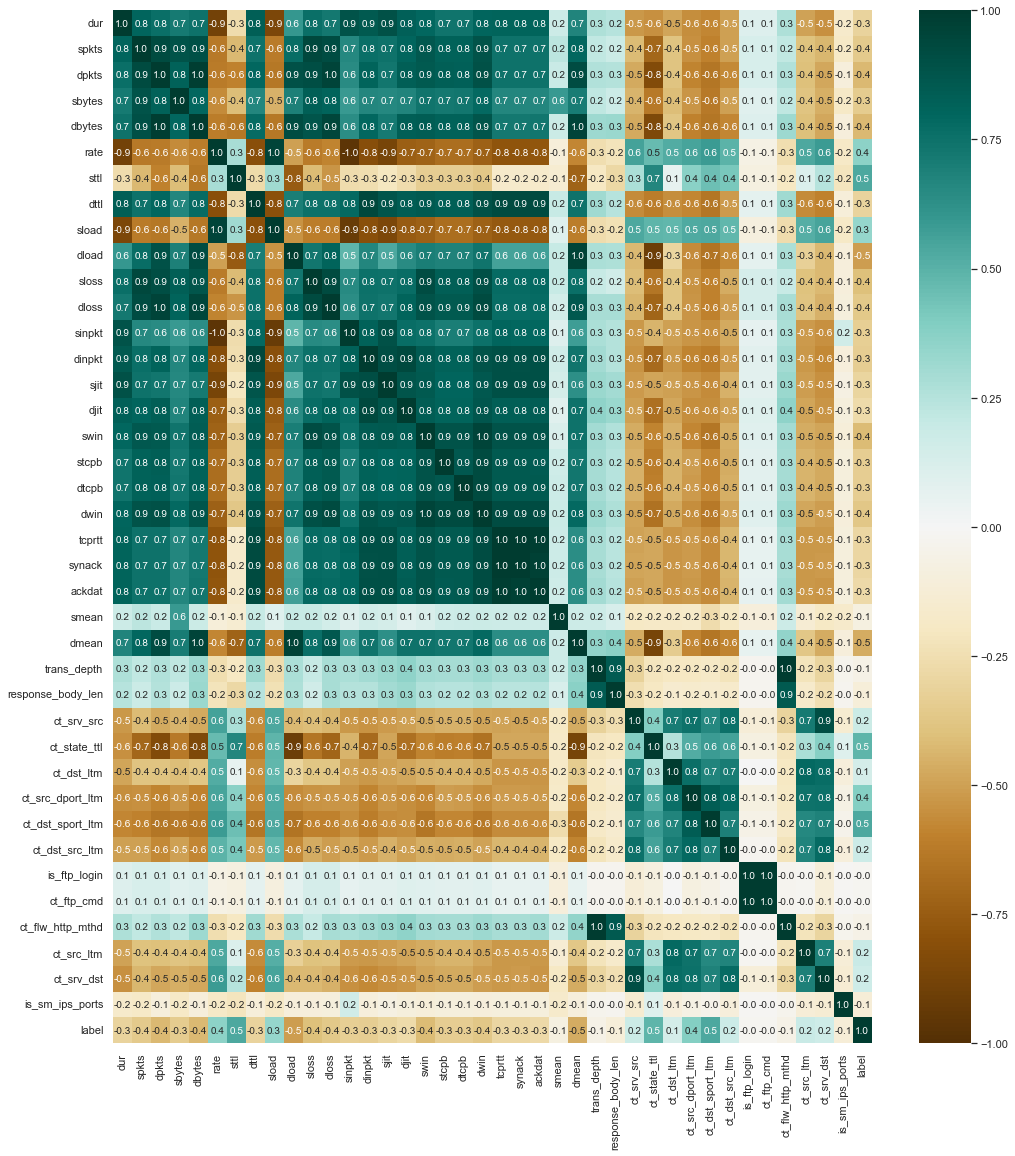

In [16]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(df_train.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".1f")
plt.show()

Widać, że wiele zmiennych posiada dużą korelację pomiędzy sobą (z dokładnością co do znaku), co oznacza, że niosą one potencjalnie tę samą informację.

### Analiza zmiennych najbardziej skorelowanych ze zmienną celu

In [22]:
corr = df_train.corr(method='spearman')['label'].abs().sort_values(ascending=False)
corr

label                1.000000
ct_dst_sport_ltm     0.536975
sttl                 0.532903
dload                0.508750
ct_state_ttl         0.489399
dmean                0.464237
dpkts                0.428268
dbytes               0.425705
swin                 0.414520
sloss                0.400742
ct_src_dport_ltm     0.384936
dwin                 0.369306
dloss                0.365764
rate                 0.363144
spkts                0.355412
sbytes               0.345572
dinpkt               0.343538
dtcpb                0.340297
sload                0.340291
stcpb                0.338949
sinpkt               0.328979
dttl                 0.311155
dur                  0.305558
sjit                 0.302590
synack               0.296782
tcprtt               0.294617
ackdat               0.277922
djit                 0.267074
ct_src_ltm           0.190154
ct_srv_src           0.182837
ct_dst_src_ltm       0.179599
ct_srv_dst           0.165086
ct_dst_ltm           0.143805
is_sm_ips_

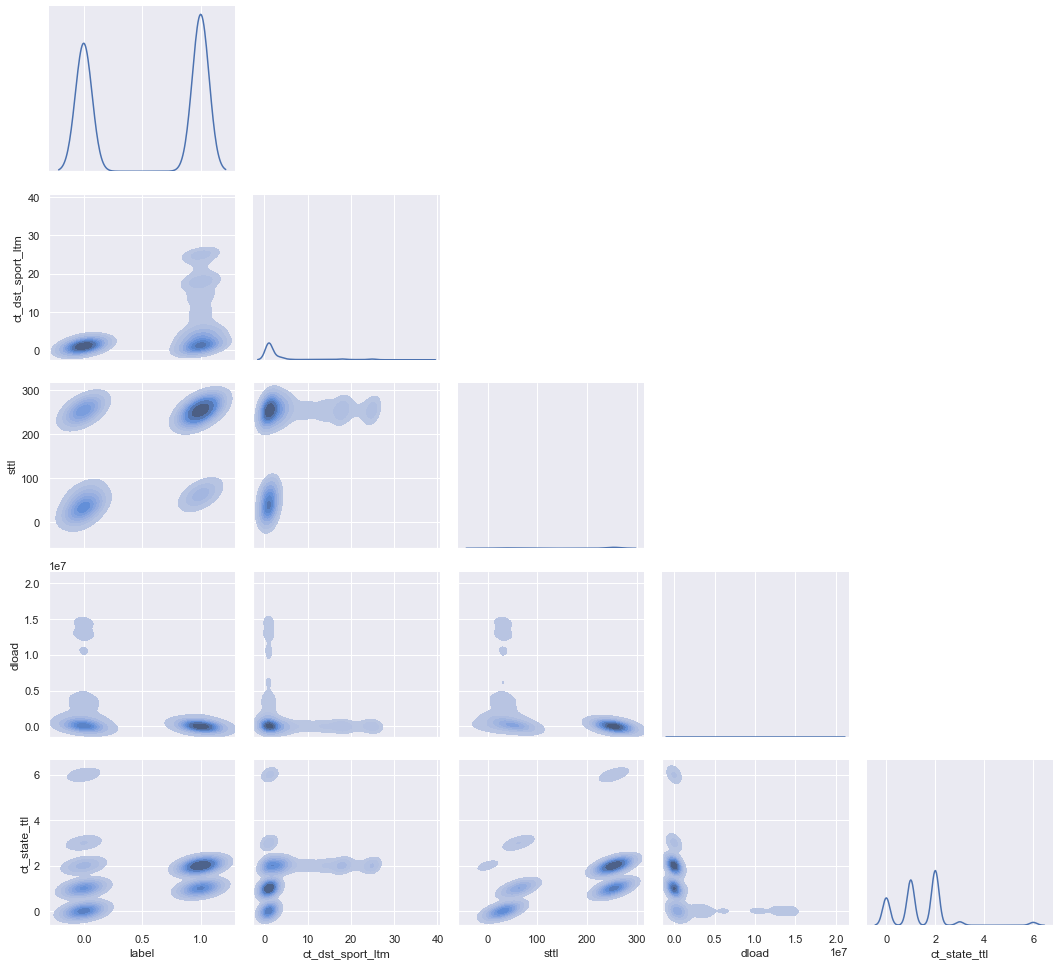

In [28]:
grid = sns.PairGrid(df_train.sample(frac=0.2, random_state=420), vars=corr.index[:5].to_list(), corner=True)
grid = grid.map_lower(sns.kdeplot, fill=True, thresh=0.05)
grid = grid.map_diag(sns.kdeplot)

grid.fig.tight_layout()

grid.fig.set_size_inches(15, 15)

plt.subplots_adjust(top=0.9)

### Analiza gini poszczególnych zmiennych numerycznych

In [32]:
def calc_gini(y):
    if np.unique(y).shape[0] < 2:
        return 0
    return 1 - (y[y==1].shape[0]/y.shape[0])**2 - (y[y==0].shape[0]/y.shape[0])**2

In [33]:
def calc_vector_split(vector, y):
    assert(vector.shape == y.shape)
    split_left = np.argwhere(vector == 0)
    split_right = np.argwhere(vector != 0)
    l_y = y[split_left]
    r_y = y[split_right]
    gini_score = (calc_gini(r_y)*r_y.shape[0]+calc_gini(l_y)*l_y.shape[0])/y.shape[0]
    return gini_score


In [34]:
def calculate_gini_numeric(column, y):
    order = np.argsort(column)
    column = column[order]
    y = y.iloc[order]
    # means = (column[1:] + column[:-1])/2
    quantiles = np.quantile(column, np.arange(0, 1, 0.02))

    gini_scores = np.zeros(len(quantiles[1:]))
    for i, quantile_split in enumerate(quantiles[1:]):
        binary_col = column<quantile_split
        gini_score = calc_vector_split(binary_col, y.values)
        gini_scores[i] = gini_score
        # gini_scores.append(gini_scores)
        # print(f"{gini_score:.5f} for quantile {quantile_split:.4f}")
    return gini_scores


In [35]:
def get_gini_heatmap(df : pd.DataFrame, columns, y):
    gini_heatmap = pd.DataFrame()
    for col in columns:
        gini_heatmap[col] = calculate_gini_numeric(df[col].values, y)
    return gini_heatmap

In [36]:
numerical_columns_list = numerical_columns.tolist()
numerical_columns_list.remove('label')
gini_heatmap = get_gini_heatmap(df_train, numerical_columns_list, df_train['label'])

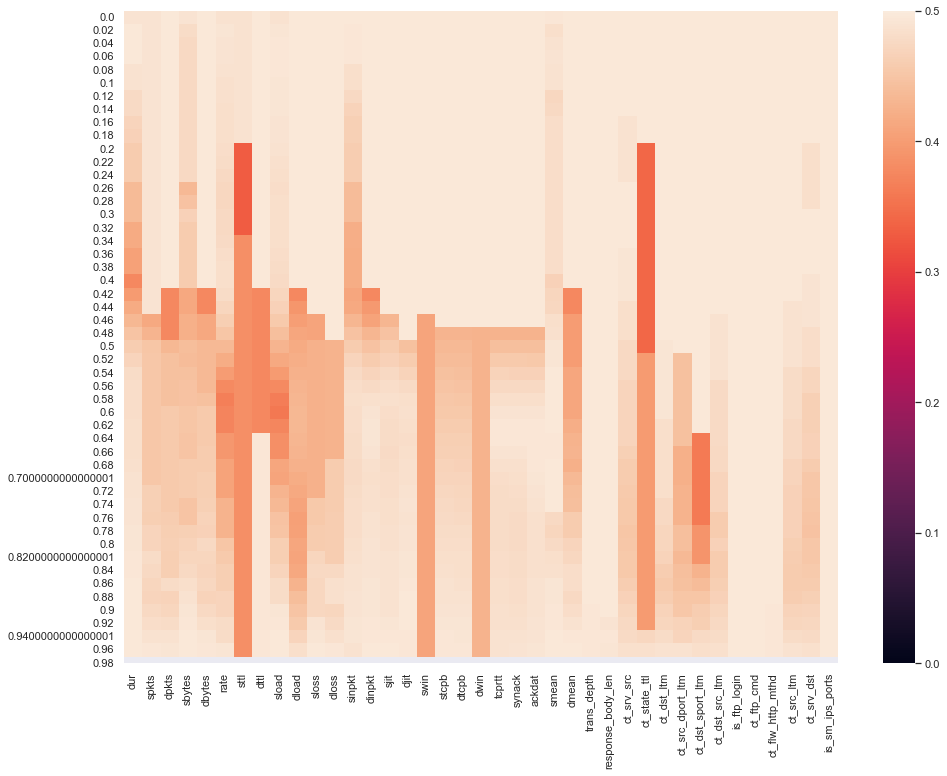

In [37]:
plt.figure(figsize=(16, 12))
sns.heatmap(gini_heatmap, yticklabels=np.arange(0, 1, 0.02), vmin=0, vmax=0.5)
plt.show()

Widać, że zmienne `sttl`, `ct_state_ttl` są potencjalnie najlepszym predykatorem.